In [1]:
import sympy

In [2]:
from sympy import symbols
from sympy.plotting import plot


In [3]:
%matplotlib inline


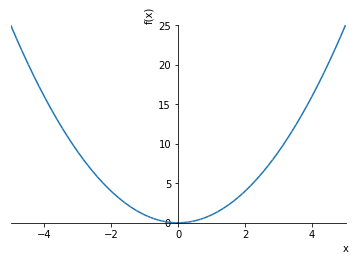

In [4]:
# experimenting with example from http://docs.sympy.org/latest/modules/plotting.html

x = symbols('x')
plot(x**2, (x, -5, 5))

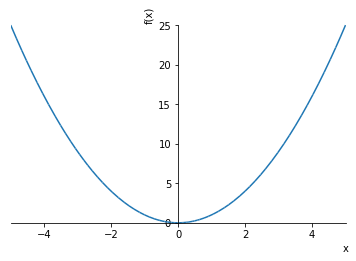

In [5]:
# nice.  let's see if I can extract the figure from that and work with it.
symplot = plot(x**2, (x, -5, 5))

In [6]:
symplot.backend

sympy.plotting.plot.DefaultBackend

In [7]:
symplot.backend.fig

AttributeError: type object 'DefaultBackend' has no attribute 'fig'

In [8]:
symplot._backend

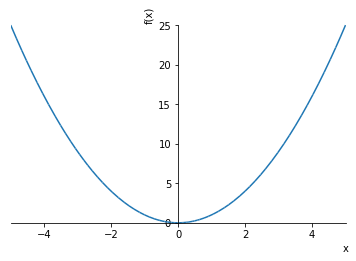

In [9]:
symplot._backend.fig

In [10]:
type(symplot._backend.fig)

matplotlib.figure.Figure

In [11]:
type(symplot._backend.ax)

matplotlib.axes._subplots.AxesSubplot

In [12]:
# sweet.  Let's see what I can do with that.
underlying_figure = symplot._backend.fig
underlying_axes = symplot._backend.ax

In [13]:
underlying_axes.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x110d78160>),
             ('right', <matplotlib.spines.Spine at 0x110d78080>),
             ('bottom', <matplotlib.spines.Spine at 0x110e21dd8>),
             ('top', <matplotlib.spines.Spine at 0x110e21f28>)])

In [14]:
underlying_axes.spines['top'].set_visible(False)
underlying_axes.spines['right'].set_visible(False)
underlying_axes.spines['left'].set_visible(False)
underlying_axes.spines['bottom'].set_visible(False)

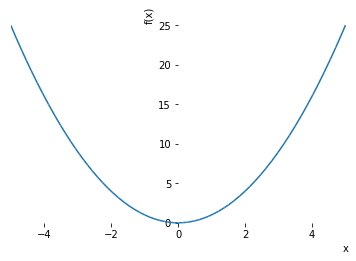

In [15]:
underlying_figure

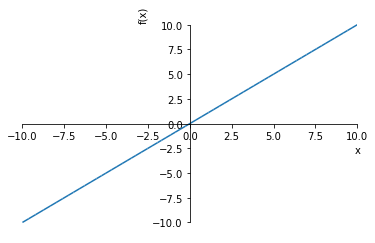

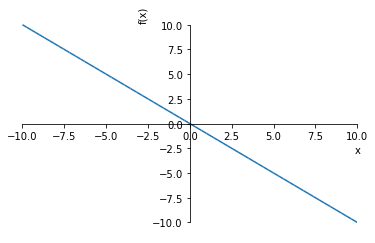

In [17]:
# ok!  I can manipulate at will!  Now let's do two intersecting lines.
subpl1 = plot(x)
subpl2 = plot(-x)
subpl1.append(subpl2[0])

In [18]:
subpl1

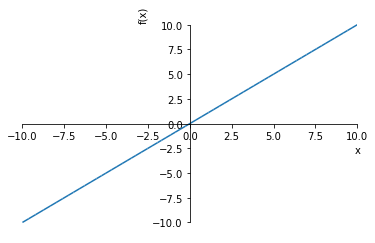

In [19]:
subpl1._backend.fig

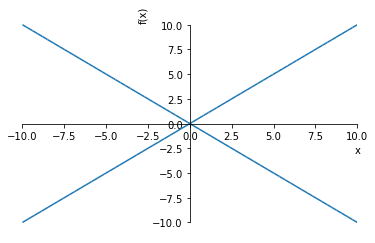

In [20]:
# hmm.  that doesn't seem to do what I expected it to. 
newtry = plot(x, -x)

In [21]:
# coolbeans 
myfig = newtry._backend.fig
myax = newtry._backend.ax

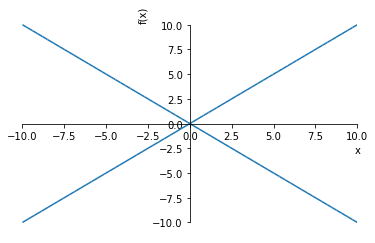

In [22]:
myfig

In [23]:
dir(myax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_o

In [24]:
# hmm maybe rather than digging into the sympy figure I should just do this in raw matplotlib so I have fake data
import matplotlib.pyplot as plt
import numpy as np

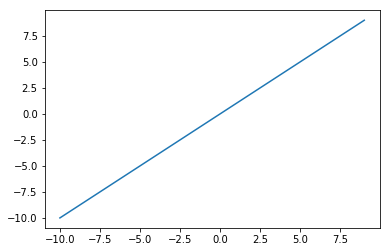

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.array(range(-10, 10))
y1 = np.array(range(-10, 10))
y2 = np.array(range(10, -10, -1))
ax.plot(x, y1)

In [26]:
ax.plot(x, y2)

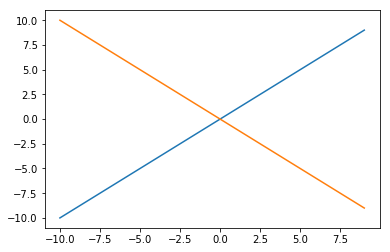

In [27]:
fig

In [28]:
ax.fill_between(x,y1,0,color='cyan')

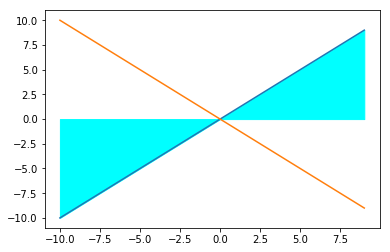

In [29]:
fig

In [31]:
ax.fill_between(x,y2,0,color='red')

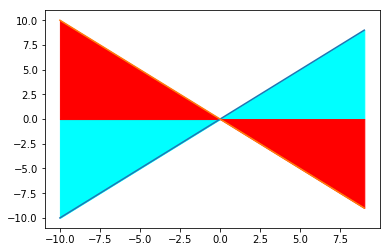

In [32]:
fig

In [33]:
# this has more promise.  need to explore later.